In [2]:
!pip install plotly
!pip install numpy

In [4]:
import numpy as np
import sklearn
import plotly
import pandas as pd

## Understanding the dataset!

In [5]:
data = pd.read_csv("./U.S._Chronic_Disease_Indicators__CDI_.csv")
data.head()

C:\Users\Windows\AppData\Local\Temp\ipykernel_4552\1647966677.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./U.S._Chronic_Disease_Indicators__CDI_.csv")


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [6]:
# I remove these columns because all of the entries are null and thus not useful. I can't extrapolate any data from this and thus, not neccessary for analysis.
data.drop(columns=['Response', 
                   'StratificationCategory2', 
                   'StratificationCategory3', 
                   'Stratification3', 
                   'ResponseID', 
                   'StratificationCategoryID2', 
                   'StratificationID2', 
                   'StratificationCategoryID3', 
                   'StratificationID3'], inplace=True)
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Stratification2', 'GeoLocation', 'LocationID',
       'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1'],
      dtype='object')

In [11]:
# Understand the data types associated with each column of the data.
# Also parse this information for plotting for visual context of data!
import os

with open("./output.txt", "w") as file:       # Output this to a file so that 
    for col, dtype in zip(data, data.dtypes):
        file.write(f"{col}\t\t{dtype}\n")
        if dtype == object:
            file.write(f"{str(data[col].unique())}\n")
        else:
            file.write(f"{str(data[col].describe())}\n")
        file.write("\n")

## Split by Topic

In [13]:
# Define the documentation
topic_dictionary = {topic : data[data['Topic'] == topic] for topic in data['Topic'].unique()}

In [16]:
# Check the result of the first key "Asthma"
topic_dictionary['Asthma'].head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,StratificationCategory1,Stratification1,Stratification2,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,916,...,Gender,Male,NaN,POINT (-92.27449074299966 34.74865012400045),5,AST,AST3_1,NMBR,GENDER,GENM
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,2227,...,Overall,Overall,NaN,POINT (-106.13361092099967 38.843840757000464),8,AST,AST3_1,NMBR,OVERALL,OVR
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,708,...,Overall,Overall,NaN,POINT (-77.036871 38.907192),11,AST,AST3_1,NMBR,OVERALL,OVR
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,3520,...,Gender,Female,NaN,POINT (-83.62758034599966 32.83968109300048),13,AST,AST3_1,NMBR,GENDER,GENF
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,123,...,Race/Ethnicity,Hispanic,NaN,POINT (-84.71439026999968 44.6613195430005),26,AST,AST3_1,NMBR,RACE,HIS


<BarContainer object of 17 artists>

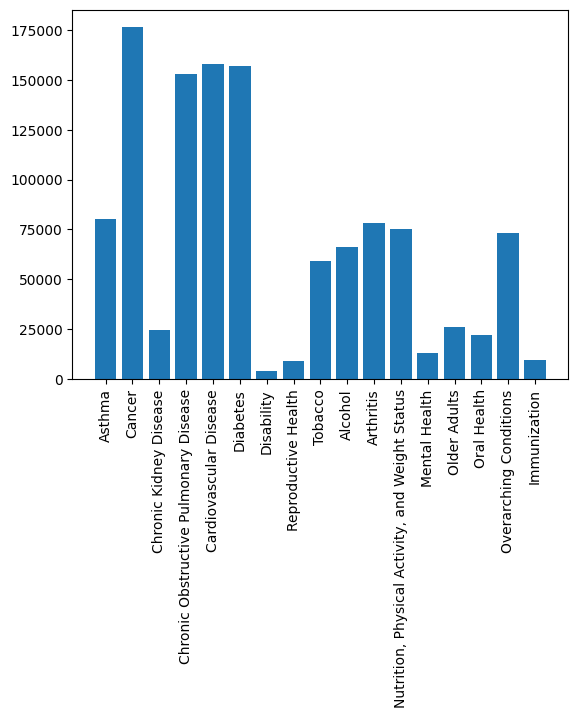

In [20]:
# Get the distribution of topics.
import matplotlib.pyplot as plt

names = list(topic_dictionary.keys())
height = [len(topic_dictionary[key]) for key in names]

plt.xticks(rotation=90)
plt.bar(names, height)

In [21]:
topic_dictionary['Cancer']

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,StratificationCategory1,Stratification1,Stratification2,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
29,2008,2012,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,Average Annual Number,329,...,Gender,Male,NaN,POINT (-75.54397042699964 42.82700103200045),36,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM
30,2009,2013,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,Average Annual Number,336,...,Gender,Male,NaN,POINT (-75.54397042699964 42.82700103200045),36,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM
31,2011,2015,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,Average Annual Number,344,...,Gender,Male,NaN,POINT (-75.54397042699964 42.82700103200045),36,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM
32,2012,2016,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,Average Annual Number,354,...,Gender,Male,NaN,POINT (-75.54397042699964 42.82700103200045),36,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM
33,2012,2016,CO,Colorado,Death Certificate,Cancer,"Cancer of the prostate, mortality",NaN,Average Annual Number,454,...,Overall,Overall,NaN,POINT (-106.13361092099967 38.843840757000464),8,CAN,CAN11_2,AVGANNNMBR,OVERALL,OVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185425,2020,2020,WY,Wyoming,BRFSS,Cancer,Papanicolaou smear use among adult women aged ...,%,Age-adjusted Prevalence,72.6,...,Overall,Overall,NaN,POINT (-108.10983035299967 43.23554134300048),56,CAN,CAN2_1,AGEADJPREV,OVERALL,OVR
1185448,2020,2020,WY,Wyoming,BRFSS,Cancer,"Fecal occult blood test, sigmoidoscopy, or col...",%,Age-adjusted Prevalence,NaN,...,Race/Ethnicity,"Multiracial, non-Hispanic",NaN,POINT (-108.10983035299967 43.23554134300048),56,CAN,CAN3_0,AGEADJPREV,RACE,MRC
1185556,2020,2020,WY,Wyoming,BRFSS,Cancer,"Fecal occult blood test, sigmoidoscopy, or col...",%,Crude Prevalence,49.8,...,Race/Ethnicity,Hispanic,NaN,POINT (-108.10983035299967 43.23554134300048),56,CAN,CAN3_0,CRDPREV,RACE,HIS
1185615,2020,2020,WY,Wyoming,BRFSS,Cancer,Mammography use among women aged 50-74 years,%,Crude Prevalence,NaN,...,Race/Ethnicity,"Other, non-Hispanic",NaN,POINT (-108.10983035299967 43.23554134300048),56,CAN,CAN1_0,CRDPREV,RACE,OTH
